In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
from collections import Counter

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


plt.style.use("seaborn")

u, s = "µ", "σ"

In [3]:
def test_normal(x):
    k2, p = stats.normaltest(x)
    alpha = 1e-3
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("It's not a normal distribution")
    else:
        print("It's a normal distribution")
        
    plt.hist(x)
    plt.show()

# Aufgabe 1

In [4]:
df = pd.read_csv("data/credict_data_german.csv2.csv")
print(df.shape)
print(df.columns)
df.head()

(1000, 21)
Index(['checking account', 'duration [month]', 'credit history', 'purpose',
       'amount', 'savings', 'employment', 'installment', 'status', 'debtors',
       'resident since', 'property', 'age [years]', 'plans', 'housing',
       'existing credits', 'job', 'maintaining people', 'phone registered',
       'foreign worker', 'classification'],
      dtype='object')


,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


In [5]:
# amount // duration [month]
df.corr().unstack().sort_values()

amount              installment          -0.271316
installment         amount               -0.271316
                    maintaining people   -0.071207
maintaining people  installment          -0.071207
age [years]         duration [month]     -0.036136
duration [month]    age [years]          -0.036136
maintaining people  duration [month]     -0.023834
duration [month]    maintaining people   -0.023834
existing credits    duration [month]     -0.011284
duration [month]    existing credits     -0.011284
amount              maintaining people    0.017142
maintaining people  amount                0.017142
existing credits    amount                0.020795
amount              existing credits      0.020795
existing credits    installment           0.021669
installment         existing credits      0.021669
amount              resident since        0.028926
resident since      amount                0.028926
amount              age [years]           0.032716
age [years]         amount     

No handles with labels found to put in legend.


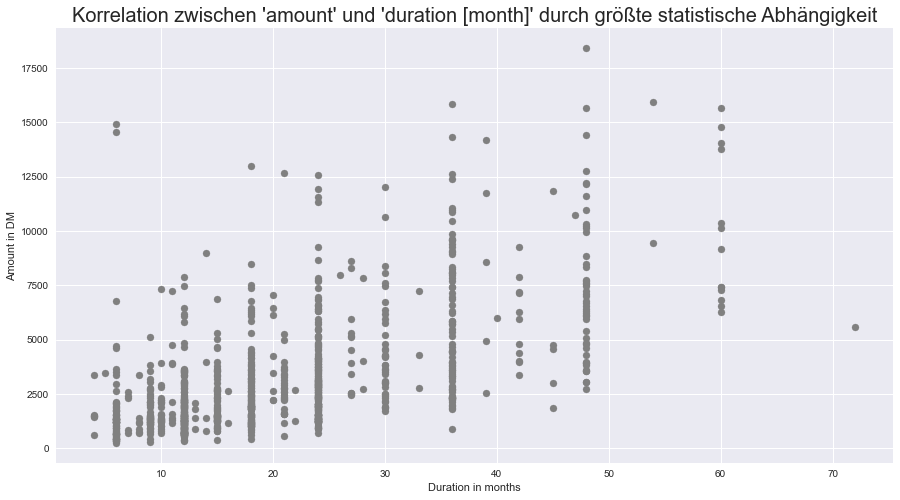


#########################################
CAPTION: Abbildung 1
Auf dieser Abbildung ist die Korrelation zwischen 
der Höhe des vergebenen Kredits und der Dauer in Monaten
angegeben. 
Diese Variablen haben eine statistische Abhängigkeit
von p=0.6249841983009851
#########################################



In [6]:
plot_df = df[["amount", "duration [month]"]]
x_data = df["duration [month]"] # can be a range object
y_data = df["amount"]

title = "Korrelation zwischen 'amount' und 'duration [month]' durch größte statistische Abhängigkeit"
x_label = "Duration in months"
y_label = "Amount in DM"

caption = f"""
#########################################
CAPTION: Abbildung 1
Auf dieser Abbildung ist die Korrelation zwischen 
der Höhe des vergebenen Kredits und der Dauer in Monaten
angegeben. 
Diese Variablen haben eine statistische Abhängigkeit
von p={df.corr().unstack().sort_values()[-8]}
#########################################
"""

# size = np.array(list(Counter(data).values())) * 15
# data_x = [x for x, _ in Counter(data).keys()]
# data_y = [y for _, y in Counter(data).keys()]


plt.figure(figsize=(15, 8))
plt.title(title, size=20)

plt.scatter(x=x_data, y=y_data, color="gray") #s=size

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend()

plt.show()
print(caption)

# Aufgabe 2

In [7]:
df.head(1)

,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good


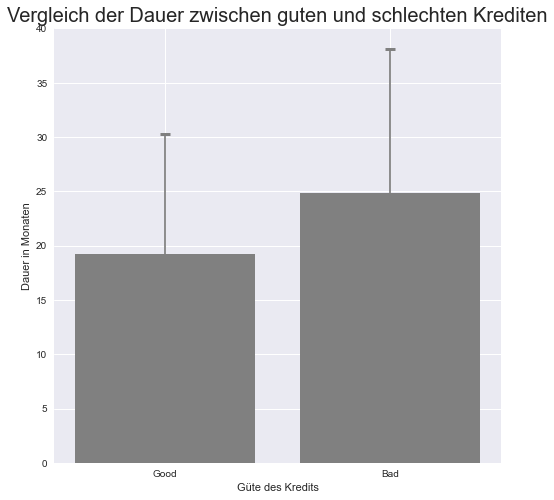


#########################################
CAPTION: Abbildung 2
Auf dieser Abbildung kann man den Unterschied
in der Dauer zwischen guten und schlechten 
Krediten erkennen. Diese sind statistisch 
voneinander abhängig.
t_val=-6.9522507242467215, p_val=6.4880498771843485e-12
#########################################



In [8]:
cl_good = df[df["classification"] == "good"]["duration [month]"]
cl_bad = df[df["classification"] == "bad"]["duration [month]"]

t_val, p_val = ttest_ind(cl_good, cl_bad)


x_data = ["Good", "Bad"]
y_data = [cl_good.mean(), cl_bad.mean()]

title = "Vergleich der Dauer zwischen guten und schlechten Krediten"
x_label = "Güte des Kredits"
y_label = "Dauer in Monaten"

caption = f"""
#########################################
CAPTION: Abbildung 2
Auf dieser Abbildung kann man den Unterschied
in der Dauer zwischen guten und schlechten 
Krediten erkennen. Diese sind statistisch 
voneinander abhängig.
t_val={t_val}, p_val={p_val}
#########################################
"""

plt.figure(figsize=(8, 8))

plt.title(title, size=20)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks()

plt.bar(x=x_data, height=y_data, color="gray")
plt.errorbar(x_data, y=y_data, yerr=[cl_good.std(), cl_bad.std()], ls="none", color="gray", capsize=5, capthick=3)

plt.show()
print(caption)

# Aufgabe 3

In [9]:
df.head(1)

,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good


In [10]:
crosstab = pd.crosstab(df["checking account"], df["classification"])
chi2, pval, dof, expectedFreq=chi2_contingency(crosstab)

output = f"""
#########################################
Checking Account vs. Classification

{crosstab}

X²-Wert={chi2}, p_val={pval}
#########################################
"""

print(output)


#########################################
Checking Account vs. Classification

classification    bad  good
checking account           
A11               135   139
A12               105   164
A13                14    49
A14                46   348

X²-Wert=123.72094351626559, p_val=1.2189020722893842e-26
#########################################



In [11]:
crosstab = pd.crosstab(df["job"], df["classification"])
chi2, pval, dof, expectedFreq=chi2_contingency(crosstab)

output = f"""
#########################################
Job vs. Classification

{crosstab}

X²-Wert={chi2}, p_val={pval}
#########################################
"""

print(output)


#########################################
Job vs. Classification

classification  bad  good
job                      
A171              7    15
A172             56   144
A173            186   444
A174             51    97

X²-Wert=1.8851560280131707, p_val=0.5965815918843431
#########################################



In [12]:
output = """
Es ist zu erkennen, dass CheckingAccount - Classification durch den geringen p-Wert statistisch voneinander 
abhängig sind.
Bei der Kombination Job - Classification haben wir im Gegensatz einen relativ hohen p-Wert, was das Gegenteil bezeugt.
"""
print(output)


Es ist zu erkennen, dass CheckingAccount - Classification durch den geringen p-Wert statistisch voneinander 
abhängig sind.
Bei der Kombination Job - Classification haben wir im Gegensatz einen relativ hohen p-Wert, was das Gegenteil bezeugt.



# Aufgabe 4

In [13]:
df = pd.read_csv("data/credict_data_german.csv2.csv")
df.head(1)

,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good


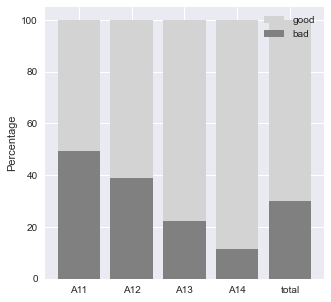

classification        bad       good  Abweichung von Total
A11             49.270073  50.729927              0.542652
A12             39.033457  60.966543              0.211672
A13             22.222222  77.777778             -0.142857
A14             11.675127  88.324873             -0.296388
total           30.000000  70.000000              0.000000





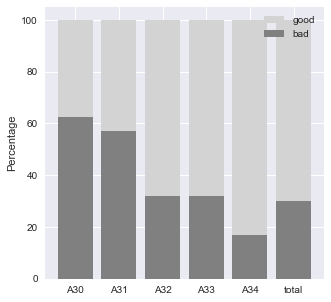

classification        bad       good  Abweichung von Total
A30             62.500000  37.500000              1.238095
A31             57.142857  42.857143              0.904762
A32             31.886792  68.113208              0.039573
A33             31.818182  68.181818              0.038095
A34             17.064846  82.935154             -0.222810
total           30.000000  70.000000              0.000000





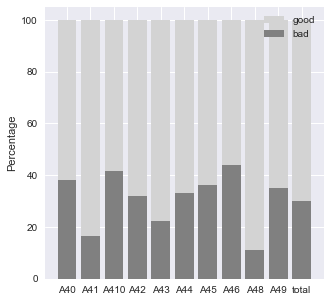

classification        bad       good  Abweichung von Total
A40             38.034188  61.965812              0.185222
A41             16.504854  83.495146             -0.230897
A410            41.666667  58.333333              0.285714
A42             32.044199  67.955801              0.042973
A43             22.142857  77.857143             -0.144168
A44             33.333333  66.666667              0.071429
A45             36.363636  63.636364              0.142857
A46             44.000000  56.000000              0.357143
A48             11.111111  88.888889             -0.303571
A49             35.051546  64.948454              0.111111
total           30.000000  70.000000              0.000000





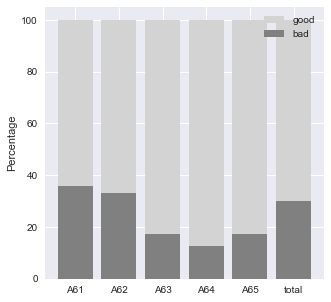

classification        bad       good  Abweichung von Total
A61             35.986733  64.013267              0.133605
A62             33.009709  66.990291              0.064182
A63             17.460317  82.539683             -0.217033
A64             12.500000  87.500000             -0.285714
A65             17.486339  82.513661             -0.216651
total           30.000000  70.000000              0.000000





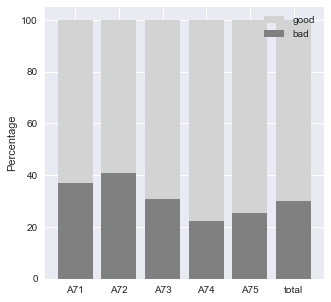

classification        bad       good  Abweichung von Total
A71             37.096774  62.903226              0.161172
A72             40.697674  59.302326              0.257703
A73             30.678466  69.321534              0.013982
A74             22.413793  77.586207             -0.139683
A75             25.296443  74.703557             -0.089947
total           30.000000  70.000000              0.000000





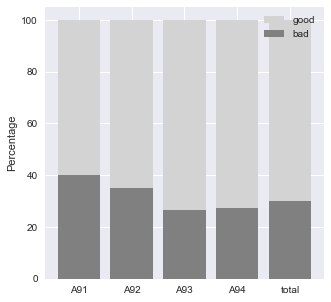

classification        bad       good  Abweichung von Total
A91             40.000000  60.000000              0.238095
A92             35.161290  64.838710              0.113717
A93             26.642336  73.357664             -0.065387
A94             27.173913  72.826087             -0.055437
total           30.000000  70.000000              0.000000





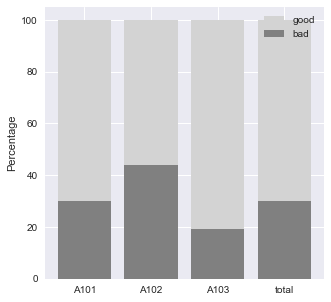

classification        bad       good  Abweichung von Total
A101            29.988975  70.011025             -0.000225
A102            43.902439  56.097561              0.354037
A103            19.230769  80.769231             -0.190476
total           30.000000  70.000000              0.000000





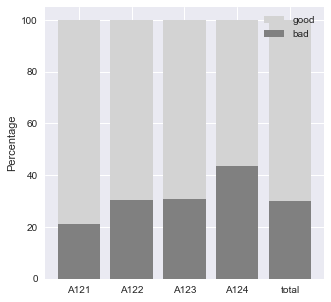

classification        bad       good  Abweichung von Total
A121            21.276596  78.723404             -0.158301
A122            30.603448  69.396552              0.012422
A123            30.722892  69.277108              0.014907
A124            43.506494  56.493506              0.341544
total           30.000000  70.000000              0.000000





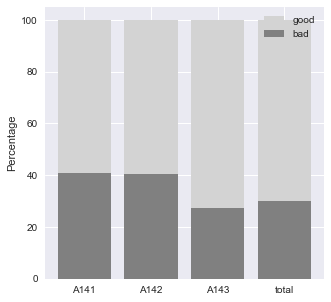

classification        bad       good  Abweichung von Total
A141            41.007194  58.992806              0.266551
A142            40.425532  59.574468              0.250000
A143            27.518428  72.481572             -0.048910
total           30.000000  70.000000              0.000000





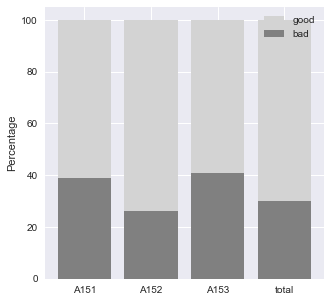

classification        bad       good  Abweichung von Total
A151            39.106145  60.893855              0.213630
A152            26.086957  73.913043             -0.075630
A153            40.740741  59.259259              0.258929
total           30.000000  70.000000              0.000000





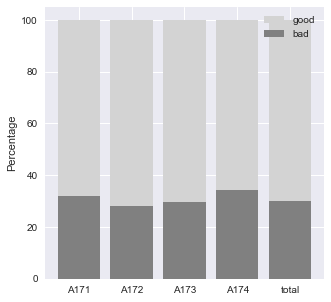

classification        bad       good  Abweichung von Total
A171            31.818182  68.181818              0.038095
A172            28.000000  72.000000             -0.039683
A173            29.523810  70.476190             -0.009653
A174            34.459459  65.540541              0.097202
total           30.000000  70.000000              0.000000





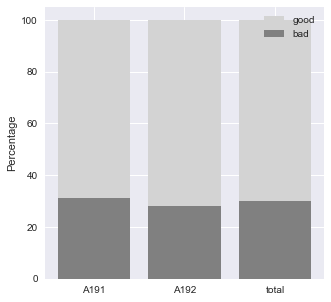

classification        bad       good  Abweichung von Total
A191            31.375839  68.624161              0.028641
A192            27.970297  72.029703             -0.040255
total           30.000000  70.000000              0.000000





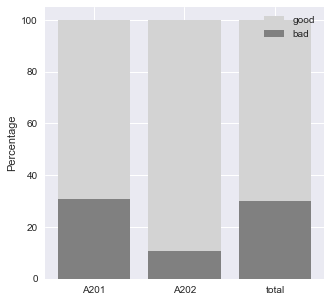

classification        bad       good  Abweichung von Total
A201            30.737279  69.262721              0.015207
A202            10.810811  89.189189             -0.307359
total           30.000000  70.000000              0.000000





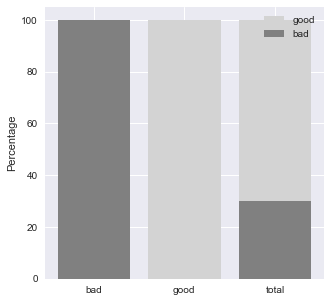

classification    bad   good  Abweichung von Total
bad             100.0    0.0                   inf
good              0.0  100.0             -0.428571
total            30.0   70.0              0.000000





,Feature,p-val
0,checking account,1.218902e-26
1,duration [month],6.488050e-12
2,credit history,1.279187e-12
3,purpose,1.157491e-04
4,amount,8.797572e-07
5,savings,2.761214e-07
6,employment,1.045452e-03


In [16]:
cl_good = df[df["classification"] == "good"]
cl_bad = df[df["classification"] == "bad"]

results = pd.DataFrame({"Feature": [], "p-val": []})

for feature in df.columns:
    if str(df[feature].dtype) == "int64":
        _, p_val = ttest_ind(cl_good[feature], cl_bad[feature])
    elif str(df[feature].dtype) == "object":
        contingencyTable = pd.crosstab(df[feature], df["classification"])
        chi2, p_val, dof, expectedFreq = chi2_contingency(contingencyTable)
        
        stackedbarchart_from_contingency(contingencyTable)
    else:
        print("ERROR")
        
    results.loc[len(results)] = [feature, p_val]
        
results.sort_values(by="p-val").reset_index(inplace=True)
results.head(7)

In [17]:
from copy import deepcopy
def stackedbarchart_from_contingency(contingencyTable,xlabel=None,title=None):
    percentages = []


    for i,target_col in enumerate(contingencyTable.columns):
        percentage_onelabel = []
        for j,label in enumerate(contingencyTable.index):
            val = contingencyTable.loc[label][target_col]
            summe = contingencyTable.loc[label].sum()
            percentage = (val/summe) *100
            percentage_onelabel.append(percentage)

        val = contingencyTable[target_col].sum()
        total = contingencyTable.sum().sum()

        percentage_onelabel.append(val*100/total)
        percentages.append(percentage_onelabel)


    percentages_backup = deepcopy(percentages)
    # print('per',percentages)

    # add up preceeding percentages for barchart
    for i in range(1,len(percentages)):
        for j in range(0,len(percentages[i])):
            percentages[i][j] += percentages[i-1][j]

    # print(percentages,contingencyTable.index)
    colors = ['grey','lightgrey','black','dimgrey']
    plt.figure(figsize=(5,5))
    
    # print(percentages)
    
    labels = list(contingencyTable.index)+['total']
    labels = [str(v) for v in labels]

    for i in range(len(percentages)-1,-1,-1):
        
        plt.bar(labels,percentages[i],label=contingencyTable.columns[i],color=colors[i])
    
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(title)
    
    plt.legend(loc="upper right")
    plt.show()

    # print('In Percent ',list(contingencyTable.index)+['total'])

    data = []
    data_transposed = []
    for i in range(len(percentages_backup)-1,-1,-1):
        # print(contingencyTable.columns[i],percentages_backup[i])
        data_transposed.append(percentages_backup[i])

    data_transposed = list(reversed(data_transposed))
    for i in range(len(data_transposed[0])):
        row = []
        for j in range(len(data_transposed)):
            row.append(data_transposed[j][i])
        
        data.append(row)
    
    df = pd.DataFrame(data=data,columns=contingencyTable.columns, index=list(contingencyTable.index)+['total'])
    try:
        totalratio = df.loc['total'][0] /df.loc['total'][1]
        df['Abweichung von Total'] = df.iloc[:,0]/df.iloc[:,1] - totalratio
    except:
        print('Cant generate total')

    print(df)
    print("\n\n")

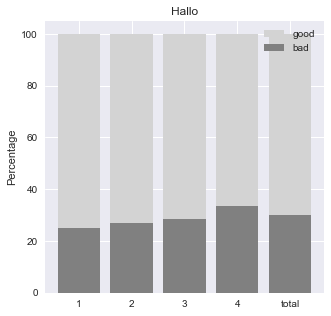

classification        bad       good  Abweichung von Total
1               25.000000  75.000000             -0.095238
2               26.839827  73.160173             -0.061708
3               28.662420  71.337580             -0.026786
4               33.403361  66.596639              0.073006
total           30.000000  70.000000              0.000000





In [18]:
stackedbarchart_from_contingency(pd.crosstab(df["installment"], df["classification"]), title="Hallo")